In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
import plotly.graph_objects as go
#pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image

ModuleNotFoundError: No module named 'wordcloud'

In [75]:
FILENAME = 'dataset/articles_data_homeproject.csv'
df = pd.read_csv(FILENAME, index_col=0)


In [76]:
df = df.copy()
df.head()

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


In [77]:
df.shape

(10437, 14)

In [79]:
df.nunique() 

source_id                             13
source_name                           13
author                              2580
title                               9810
description                         9173
url                                10433
url_to_image                        8363
published_at                        9441
content                             8385
top_article                            2
engagement_reaction_count           1187
engagement_comment_count             817
engagement_share_count              1065
engagement_comment_plugin_count       10
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10437 entries, 0 to 10436
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   source_id                        10437 non-null  object 
 1   source_name                      10437 non-null  object 
 2   author                           9417 non-null   object 
 3   title                            10435 non-null  object 
 4   description                      10413 non-null  object 
 5   url                              10436 non-null  object 
 6   url_to_image                     9781 non-null   object 
 7   published_at                     10436 non-null  object 
 8   content                          9145 non-null   object 
 9   top_article                      10435 non-null  float64
 10  engagement_reaction_count        10319 non-null  float64
 11  engagement_comment_count         10319 non-null  float64
 12  engagement_share_c

In [81]:
df.dtypes

source_id                           object
source_name                         object
author                              object
title                               object
description                         object
url                                 object
url_to_image                        object
published_at                        object
content                             object
top_article                        float64
engagement_reaction_count          float64
engagement_comment_count           float64
engagement_share_count             float64
engagement_comment_plugin_count    float64
dtype: object

In [83]:
df['published_at'] = pd.to_datetime(df['published_at'])
df.dtypes

source_id                                       object
source_name                                     object
author                                          object
title                                           object
description                                     object
url                                             object
url_to_image                                    object
published_at                       datetime64[ns, UTC]
content                                         object
top_article                                    float64
engagement_reaction_count                      float64
engagement_comment_count                       float64
engagement_share_count                         float64
engagement_comment_plugin_count                float64
dtype: object

In [84]:
df.isna().any()

source_id                          False
source_name                        False
author                              True
title                               True
description                         True
url                                 True
url_to_image                        True
published_at                        True
content                             True
top_article                         True
engagement_reaction_count           True
engagement_comment_count            True
engagement_share_count              True
engagement_comment_plugin_count     True
dtype: bool

In [85]:
df.isna().sum()

source_id                             0
source_name                           0
author                             1020
title                                 2
description                          24
url                                   1
url_to_image                        656
published_at                          1
content                            1292
top_article                           2
engagement_reaction_count           118
engagement_comment_count            118
engagement_share_count              118
engagement_comment_plugin_count     118
dtype: int64

In [86]:
df.replace('', np.NaN)
df = df.replace(' ', np.NaN)

In [87]:
df.fillna(value={'author': 'Not Found'}, inplace=True)
df.isna().sum()

source_id                             0
source_name                           0
author                                0
title                                 2
description                          24
url                                   1
url_to_image                        656
published_at                          1
content                            1292
top_article                           2
engagement_reaction_count           118
engagement_comment_count            118
engagement_share_count              118
engagement_comment_plugin_count     118
dtype: int64

In [88]:
df[df['author'] == 'Not Found']

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
14,bbc-news,BBC News,Not Found,Neil Lennon: Celtic manager 'very pleased' wit...,"Celtic have had a ""very good"" transfer window ...",https://www.bbc.co.uk/sport/football/49570791,https://ichef.bbci.co.uk/onesport/cps/624/cpsp...,2019-09-03 17:06:05+00:00,Media playback is not supported on this device...,0.0,0.0,0.0,0.0,0.0
29,bbc-news,BBC News,Not Found,Keith Hill: New Bolton Wanderers boss won't 'm...,New Bolton boss Keith Hill says he will protec...,https://www.bbc.co.uk/sport/football/49564550,https://ichef.bbci.co.uk/onesport/cps/624/cpsp...,2019-09-03 15:07:38+00:00,Bolton fielded the youngest side in their hist...,0.0,7.0,0.0,3.0,0.0
39,bbc-news,BBC News,Not Found,Jofra Archer slides across pitch during footba...,Ashes 2019: England's Jofra Archer celebrates ...,https://www.bbc.co.uk/sport/av/cricket/49572881,https://m.files.bbci.co.uk/modules/bbc-morph-s...,2019-09-03 17:58:22+00:00,It turns out Jofra Archer is not only good at ...,0.0,0.0,0.0,4.0,0.0
63,the-wall-street-journal,The Wall Street Journal,Not Found,"Oldest, Most Strategic U.S. Base for Deterring...","After more than 60 years, the U.S. is closing ...",https://www.wsj.com/video/oldest-most-strategi...,http://m.wsj.net/video/20190902/090319_yongsan...,2019-09-03 09:30:00+00:00,NaN,0.0,457.0,139.0,172.0,0.0
74,espn,ESPN,Not Found,Sources: Urgency in Zeke talks; RB flying back,ESPN's Chris Mortensen and Adam Schefter are r...,http://espn.go.com/nfl/story/_/id/27527411/urg...,https://a.espncdn.com/combiner/i?img=%2Fphoto%...,2019-09-03 14:22:00+00:00,Ezekiel Elliott and the Dallas Cowboys are act...,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10355,cnn,CNN,Not Found,Hear Trump's latest comment about China,President Donald Trump told reporters at the W...,https://www.cnn.com/videos/politics/2019/10/03...,https://cdn.cnn.com/cnnnext/dam/assets/1910031...,2019-10-03 15:02:10+00:00,Chat with us in Facebook Messenger. Find out w...,0.0,97.0,64.0,130.0,0.0
10377,bbc-news,BBC News,Not Found,Ben Glynn: Ospreys sign lock from Harlequins t...,Ospreys sign lock Ben Glynn from English Premi...,https://www.bbc.co.uk/sport/rugby-union/49922359,https://ichef.bbci.co.uk/onesport/cps/624/cpsp...,2019-10-03 11:28:24+00:00,Lock Ben Glynn represented England at Under-18...,0.0,32.0,4.0,4.0,0.0
10382,cnn,CNN,Not Found,Live updates: The Trump impeachment inquiry - ...,House GOP Leader McCarthy is calling on Speake...,https://www.cnn.com/politics/live-news/trump-i...,https://dynaimage.cdn.cnn.com/cnn/digital-imag...,2019-10-03 13:39:28+00:00,President Trump today publicly asked Ukraine a...,1.0,4.0,1.0,19.0,0.0
10399,the-irish-times,The Irish Times,Not Found,Paralysed Canadian diver and partner thank Ire...,"More than €82,000 raised to help James Martin ...",https://www.irishtimes.com/news/ireland/irish-...,https://www.irishtimes.com/image-creator/?id=1...,2019-10-03 15:44:23+00:00,A Canadian scuba diver who was left almost com...,0.0,0.0,0.0,0.0,0.0


In [89]:
df.fillna(value={'title': 'Not Found'}, inplace=True)
df.fillna(value={'description': 'Not Found'}, inplace=True)
df.fillna(value={'url': 'Not Found'}, inplace=True)
df.fillna(value={'url_to_image': 'Not Found'}, inplace=True)
df.fillna(value={'published_at': '000000000000'}, inplace=True)
df.fillna(value={'content': 'Not Found'}, inplace=True)
df.fillna(value={'engagement_reaction_count': '0'}, inplace=True)
df.fillna(value={'engagement_comment_count': '0'}, inplace=True)
df.fillna(value={'engagement_share_count': '0'}, inplace=True)
df.fillna(value={'engagement_comment_plugin_count': '0'}, inplace=True)

df.isna().sum()

source_id                          0
source_name                        0
author                             0
title                              0
description                        0
url                                0
url_to_image                       0
published_at                       0
content                            0
top_article                        2
engagement_reaction_count          0
engagement_comment_count           0
engagement_share_count             0
engagement_comment_plugin_count    0
dtype: int64

In [93]:
pie_chart = df['top_article'].value_counts()
pie_chart

0.0    9161
1.0    1274
NA        2
Name: top_article, dtype: int64

In [94]:
pie_chart = df['top_article'].value_counts(normalize = True).round(4)
pie_chart

0.0    0.8777
1.0    0.1221
NA     0.0002
Name: top_article, dtype: float64

In [95]:
pie_chart = df['top_article'].value_counts(normalize = True).round(4).rename_axis('Top Article')
pie_chart

Top Article
0.0    0.8777
1.0    0.1221
NA     0.0002
Name: top_article, dtype: float64

In [96]:
pie_chart = df['top_article'].value_counts(normalize = True).round(4).rename_axis('Top Article').to_frame('Percentage (%)')*100
pie_chart

,Percentage (%)
Top Article,
0.0,87.77
1.0,12.21
NA,0.02


No handles with labels found to put in legend.


array([<AxesSubplot:ylabel='Percentage (%)'>], dtype=object)

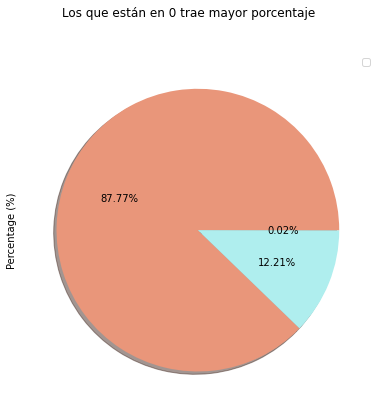

In [108]:
colors = ['DarkSalmon','PaleTurquoise']

pie_chart.plot.pie(subplots=True,autopct='%.2f%%',labels=None,figsize=(10,6.5),colors=colors, label = 'Percentage %',shadow = True,title= 'Los que están en 0 trae mayor porcentaje')

In [104]:
pie_chart1 = df['top_article'].value_counts()
pie_chart1

0.0    9161
1.0    1274
NA        2
Name: top_article, dtype: int64

In [106]:
pie = go.Figure(data=[go.Pie(labels=None,values=pie_chart1, title='Proportion of articles marked as TOP ARTICLE',pull=[0.20, 0, 0.8, 0])])
pie.show()